In [1]:
#class imbalance >> when one class has higher percentage
#how to handle ?
#upscaling
#downsampling
#SMOTE

In [38]:
import numpy as np
import pandas as pd

np.random.seed(1)  #for reproducibility of result
no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = no_samples - (no_samples*class_0_ratio)

In [40]:
no_class_0 , no_class_1

(900, 100.0)

In [42]:
class_0 = {'feature1':np.random.normal(0 , 1 , no_class_0),
           'feature2':np.random.normal(0 , 1 , no_class_0),
           'target':[0]*no_class_0}

In [46]:
class_0 = pd.DataFrame(class_0)

In [48]:
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [70]:
no_class_1 = 100
class_1 = {'feature1':np.random.normal(3,1,no_class_1),
           'feature2':np.random.normal(3,1,no_class_1),
           'target':[1]*no_class_1} 


In [72]:
class_1 = pd.DataFrame(class_1)

In [74]:
class_1

,feature1,feature2,target
0,2.894187,2.296605,1
1,3.040865,2.075490,1
2,4.172449,2.399549,1
3,2.178400,2.087413,1
4,2.220062,2.984999,1
...,...,...,...
95,3.175928,6.740249,1
96,3.638986,4.340272,1
97,4.020153,1.363526,1
98,4.792613,2.541225,1


In [76]:
df = pd.concat([class_0,class_1])

In [78]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
95,3.175928,6.740249,1
96,3.638986,4.340272,1
97,4.020153,1.363526,1
98,4.792613,2.541225,1


In [80]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [86]:
# UPSAMPLING
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

In [88]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [98]:
df_minority

,feature1,feature2,target
0,2.894187,2.296605,1
1,3.040865,2.075490,1
2,4.172449,2.399549,1
3,2.178400,2.087413,1
4,2.220062,2.984999,1
...,...,...,...
95,3.175928,6.740249,1
96,3.638986,4.340272,1
97,4.020153,1.363526,1
98,4.792613,2.541225,1


In [92]:
# Replace >> if replace is true , it means data point can be repeated
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority , replace = True , n_samples = len(df_majority), random_state=1)

In [103]:
df_minority_upsampled 

,feature1,feature2,target
37,3.656015,2.628040,1
12,2.737532,2.397929,1
72,2.122753,3.286331,1
9,2.210859,3.359461,1
75,3.420593,2.958623,1
...,...,...,...
36,3.752270,3.726680,1
98,4.792613,2.541225,1
1,3.040865,2.075490,1
32,2.839565,3.981994,1


In [105]:
df_minority_upsampled.shape

(900, 3)

In [109]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [111]:
df_upsampled

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
36,3.752270,3.726680,1
98,4.792613,2.541225,1
1,3.040865,2.075490,1
32,2.839565,3.981994,1


In [115]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [117]:
#DOWNSAMPLING
df_minority

,feature1,feature2,target
0,2.894187,2.296605,1
1,3.040865,2.075490,1
2,4.172449,2.399549,1
3,2.178400,2.087413,1
4,2.220062,2.984999,1
...,...,...,...
95,3.175928,6.740249,1
96,3.638986,4.340272,1
97,4.020153,1.363526,1
98,4.792613,2.541225,1


In [119]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [127]:
df_majority_downsampled = resample(df_majority , replace = False,n_samples = len(df_minority), random_state = 1)
df_majority_downsampled


,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [133]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [135]:
df_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
95,3.175928,6.740249,1
96,3.638986,4.340272,1
97,4.020153,1.363526,1
98,4.792613,2.541225,1


In [137]:
df_downsampled.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [139]:
#SMOTE >> SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [141]:
from sklearn.datasets import make_classification

x , y = make_classification(n_samples=1000 , n_redundant=0 , n_features= 2 , n_clusters_per_class=1, weights=[0.90])


In [143]:
x

array([[ 0.14926478,  0.92955969],
       [ 0.82370177,  0.40941048],
       [ 1.26628228,  1.01466991],
       ...,
       [-0.01500211,  1.60185467],
       [ 0.9103259 ,  1.05009892],
       [ 1.79550662,  0.5352672 ]])

In [145]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [157]:
df1 = pd.DataFrame(x , columns = ['f1' , 'f2'])
df2 = pd.DataFrame(y , columns = ['target'])
final_df = pd.concat([df1 , df2], axis=1)
final_df

,f1,f2,target
0,0.149265,0.929560,0
1,0.823702,0.409410,0
2,1.266282,1.014670,0
3,-0.200058,1.922393,0
4,0.016023,1.741696,0
...,...,...,...
995,1.655864,1.132503,0
996,1.562342,0.416321,0
997,-0.015002,1.601855,0
998,0.910326,1.050099,0


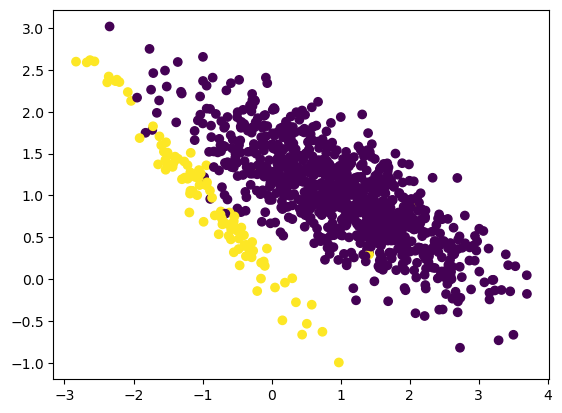

In [167]:
import matplotlib.pyplot as plt
plt.scatter(x=final_df['f1'],y=final_df['f2'],c=final_df['target'])

In [171]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [173]:
x , y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [175]:
x.shape

(1798, 2)

In [177]:
df1 = pd.DataFrame(x , columns = ['f1' , 'f2'])
df2 = pd.DataFrame(y , columns = ['target'])
smote_df = pd.concat([df1 , df2], axis=1)

In [179]:
smote_df

,f1,f2,target
0,0.149265,0.929560,0
1,0.823702,0.409410,0
2,1.266282,1.014670,0
3,-0.200058,1.922393,0
4,0.016023,1.741696,0
...,...,...,...
1793,-2.370671,2.382988,1
1794,-1.100575,1.228038,1
1795,-0.471150,0.638475,1
1796,-1.196887,1.131877,1
